# UTS Machine Learning

Nama           : Kevin Akbar Adhiguna 

NPM : 140810170055

Sumber Dataset (Breast Cancer) : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer

## 🗂 Import Library yang diperlukan untuk membaca file csv

In [ ]:
# Library Pandas untuk membaca file csv
import pandas as pd

# Function 'urlretrieve' untuk mengirim request ke Internet untuk mengunduh file csv
from urllib.request import urlretrieve

## 📑 Mengunduh file csv yang akan digunakan

In [ ]:
# Inisiasi Link untuk mengunduh file csv
breast_cancer = 'https://raw.githubusercontent.com/kevinadhiguna/datasets/master/diseases/breast-cancer.csv'

# Mengunduh file csv
urlretrieve(breast_cancer)

('/tmp/tmplmbeuda3', <http.client.HTTPMessage at 0x7f457873dd30>)

## 📖 Membaca file csv

In [ ]:
df = pd.read_csv(breast_cancer)

## 🔍 Eksplorasi Data

In [ ]:
# Menampilkan 5 baris pertama
df.head()

,prediction,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no_recurrence_events,30_39,premeno,30_34,0_2,no,three,left,left_low,no
1,no_recurrence_events,40_49,premeno,20_24,0_2,no,two,right,right_up,no
2,no_recurrence_events,40_49,premeno,20_24,0_2,no,two,left,left_low,no
3,no_recurrence_events,60_69,ge40,15_19,0_2,no,two,right,left_up,no
4,no_recurrence_events,40_49,premeno,0_4,0_2,no,two,right,right_low,no


In [ ]:
# Menampilkan 5 baris terakhir
df.tail()

,prediction,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
281,recurrence_events,30_39,premeno,30_34,0_2,no,two,left,left_up,no
282,recurrence_events,30_39,premeno,20_24,0_2,no,three,left,left_up,yes
283,recurrence_events,60_69,ge40,20_24,0_2,no,one,right,left_up,no
284,recurrence_events,40_49,ge40,30_34,3_5,no,three,left,left_low,no
285,recurrence_events,50_59,ge40,30_34,3_5,no,three,left,left_low,no


Memeriksa typedata dan apakah ada cell yang berniali null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   prediction   286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor_size   286 non-null    object
 4   inv_nodes    286 non-null    object
 5   node_caps    286 non-null    object
 6   deg_malig    286 non-null    object
 7   breast       286 non-null    object
 8   breast_quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


### 🕵🏻 Memeriksa apakah ada cell yang tidak memiliki nilai

In [ ]:
df.isnull()

,prediction,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
281,False,False,False,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False,False,False,False
283,False,False,False,False,False,False,False,False,False,False
284,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

prediction     0
age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      0
deg_malig      0
breast         0
breast_quad    0
irradiat       0
dtype: int64

Dengan demikian, diketahui bahwa tidak ada cell yang bernilai null.

Menentukan instances mana yang berupa feature dan target

In [ ]:
df_features = df.loc[:, df.columns!='prediction']
df_target = df[['prediction']]

## 🔂 One Hot Encoding

Karena fiturnya tidak biner, maka perlu adanya normalisasi. Dalam hal ini menggunakan One Hot Encoding. (Sumber Gambar : [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer))

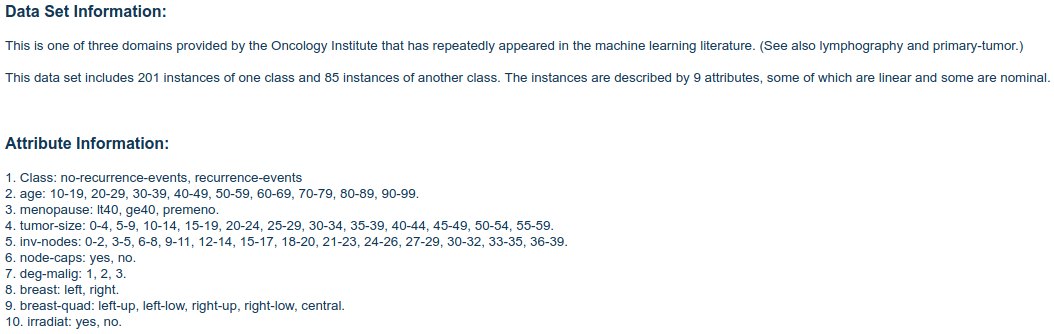

In [ ]:
df_features_onehot = pd.get_dummies(df_features)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labelled_features_onehot = df_features_onehot.apply(le.fit_transform)
labelled_target = df_target.apply(le.fit_transform)

Menentukan Data Training dan Data Testing, menggunakan sklearn

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(labelled_features_onehot, labelled_target, test_size = 0.3)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
pd.set_option('max_columns', None)
X_test

,age_20_29,age_30_39,age_40_49,age_50_59,age_60_69,age_70_79,menopause_ge40,menopause_lt40,menopause_premeno,tumor_size_0_4,tumor_size_10_14,tumor_size_15_19,tumor_size_20_24,tumor_size_25_29,tumor_size_30_34,tumor_size_35_39,tumor_size_40_44,tumor_size_45_49,tumor_size_50_54,tumor_size_5_9,inv_nodes_0_2,inv_nodes_12_14,inv_nodes_15_17,inv_nodes_24_26,inv_nodes_3_5,inv_nodes_6_8,inv_nodes_9_11,node_caps_no,node_caps_yes,deg_malig_one,deg_malig_three,deg_malig_two,breast_left,breast_right,breast_quad_central,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up,irradiat_no,irradiat_yes
0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1
82,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
83,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
84,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0


In [ ]:
pd.reset_option('max_columns')

Setelah dilakukan One Hot Encoding, jumlah fitur yang awalnya 10 fitur menjadi 41 fitur.

## 👨‍💻 Algoritma Perceptron

Awalnya terdapat Input dan Weight, yang akan dijumlahkan dengan Bias. Lalu dimasukkan ke fungsi aktivasi. Kemudian ada Output Layer.

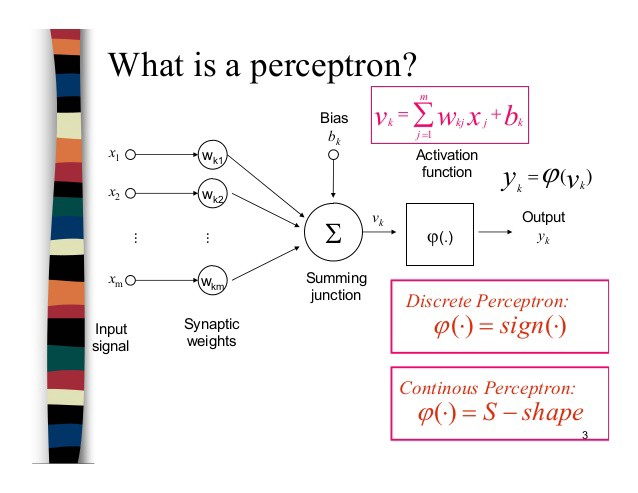

In [ ]:
import numpy as np
from random import random

class Perceptron:
    # Kelas untuk perceptron dengan binary step activation function
    
    def __init__(self):
        
        # Inisialisasi weight dan bias, namun akan ditentukan secara random
        self.w = None
        self.b = None
        
        # Weight, Bias, dan variabel lainnya yang memiliki terbaik 
        self.best_b = None
        self.best_w = None
        self.best_pred = None
        self.best_epoch = None
        self.lowest_error = None
    
    # Fungsi Aktivasi menggunakan Binary Step 
    def binary_step(self, x):
        return 1 if (x>=0) else 0
    
    # Inisialisasi weight/bobot, bias, dan variabel lainnya
    def fit(self, X, Y, epochs=50, learning_rate=0.1, initialise=True):
        if initialise:
            self.w = [random()] * X.shape[1]
            self.b = 1
            
            self.best_b = 1
            self.best_w = [0] * X.shape[1]
            self.best_pred = [0] * X.shape[0]
            self.lowest_error = np.inf
        
        y_pred = [0] * X.shape[0] 
        current_epoch = 0
        
        # Running iterasi dalam looping
        while(current_epoch < epochs):
            error = 0
            
            for index, row in X.iterrows():
                pred = 0
                # Enumerasi dalam dataset untuk prediksi
                for i, value in enumerate(row):
                    pred += self.w[i] * value # Dalam prediksi, bobot dikalikan dengan fiturnya
                    
                pred += self.b # Kemudian ditambahkan dengan Bias
                y_pred[index] = self.binary_step(pred)
                
                if(y_pred[index] != Y.iloc[index, 0]):

                    for i, value in enumerate(row):
                        # Apabila ada error, mengalami perubahan weight/bobot
                        self.w[i] += learning_rate * (Y.iloc[index,0] - y_pred[index]) * value
                        # weight ditambah dengan learning rate, lalu dikalikan target kelasnya kemudian dikurangi prediksi. Setelah itu ditambah dengan value
                    
                    self.b += learning_rate * (Y.iloc[index,0] - y_pred[index])
                    error += 1
                if(index == X.shape[0]-1):
                    current_epoch += 1
            
            if(error < self.lowest_error):
                self.best_b = self.b
                self.best_w = self.w.copy()
                self.best_pred = y_pred.copy()
                self.best_epoch = current_epoch
                self.lowest_error = error
        
            print("Accuracy Epoch ", current_epoch," : ",str(round(1-error/X.shape[0],3)*100)[0:4],"%") #print akurasi setiap epochnya
        print("Training Finished!")
    
    # Fungsi Prediksi
    def predict(self, X):
        y_pred = [0] * X.shape[0]
        pred = 0
        
        for index, row in X.iterrows():
            pred = 0
            for i, value in enumerate(row):
                pred += self.w[i] * value
                    
            pred += self.b
            y_pred[index] = self.binary_step(pred)
            
        return y_pred
        
    def get_stat(self):
        print("Best b: ", self.best_b, "\n")
        print("Best w: ", self.best_w, "\n")
        print("Best epoch: ", self.best_epoch, "\n")
        print("Lowest error: ", self.lowest_error)

### 💬 Perbedaan Perceptron Single Layer dan Multilayer :

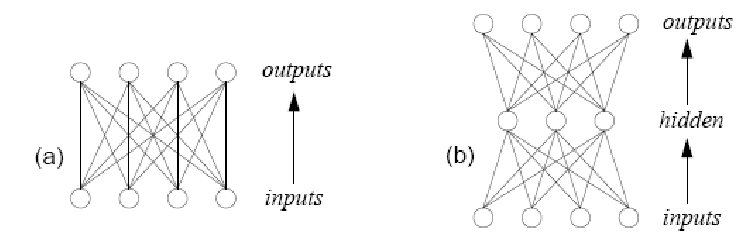

Perceptron terbagi menjadi Perceptron Single Layer dan Multilayer. Dalam hal ini penulis menggunakan Perceptron Single Layer. Adapun perbedaan utama keduanya adalah :<br/>
> Perceptron Single Layer : <br/>
- Hanya terdapat dua layer, yaitu Input dan Output Layer <br/>

> Perceptron Multilayer: <br/>
- Terdapat tiga Layer, yaitu Input, Hidden, dan Output Layer
- Ada process Backpropagation Feed-Forward dalam Hidden Layer

### 🦾 Training Model

In [ ]:
model = Perceptron()
model.fit(X_test, y_test, learning_rate = 0.008)

Accuracy Epoch  1  :  26.7 %
Accuracy Epoch  2  :  36.0 %
Accuracy Epoch  3  :  72.1 %
Accuracy Epoch  4  :  80.2 %
Accuracy Epoch  5  :  81.3 %
Accuracy Epoch  6  :  81.3 %
Accuracy Epoch  7  :  80.2 %
Accuracy Epoch  8  :  82.6 %
Accuracy Epoch  9  :  81.3 %
Accuracy Epoch  10  :  81.3 %
Accuracy Epoch  11  :  82.6 %
Accuracy Epoch  12  :  79.1 %
Accuracy Epoch  13  :  82.6 %
Accuracy Epoch  14  :  82.6 %
Accuracy Epoch  15  :  81.3 %
Accuracy Epoch  16  :  87.2 %
Accuracy Epoch  17  :  86.0 %
Accuracy Epoch  18  :  82.6 %
Accuracy Epoch  19  :  84.8 %
Accuracy Epoch  20  :  86.0 %
Accuracy Epoch  21  :  87.2 %
Accuracy Epoch  22  :  86.0 %
Accuracy Epoch  23  :  83.7 %
Accuracy Epoch  24  :  88.4 %
Accuracy Epoch  25  :  87.2 %
Accuracy Epoch  26  :  87.2 %
Accuracy Epoch  27  :  87.2 %
Accuracy Epoch  28  :  88.4 %
Accuracy Epoch  29  :  82.6 %
Accuracy Epoch  30  :  88.4 %
Accuracy Epoch  31  :  87.2 %
Accuracy Epoch  32  :  83.7 %
Accuracy Epoch  33  :  87.2 %
Accuracy Epoch  34 

### 📊 Statistik dari Training

In [ ]:
model.get_stat()

Best b:  -0.264000000000001 

Best w:  [0.46855066420800107, 0.33255066420800095, 0.21255066420800084, -0.09144933579199932, 0.22055066420800085, 0.404550664208001, -0.0754493357919993, 0.14855066420800078, 0.06855066420800071, 0.44455066420800105, 0.14055066420800078, 0.22855066420800085, 0.2605506642080009, 0.2765506642080009, 0.34055066420800095, 0.412550664208001, 0.364550664208001, 0.46855066420800107, 0.4845506642080011, 0.46855066420800107, -0.09944933579199933, 0.46855066420800107, 0.21255066420800084, 0.46855066420800107, 0.2845506642080009, 0.1725506642080008, 0.5085506642080011, -0.16344933579199938, -0.16344933579199938, 0.02855066420800071, 0.34055066420800095, -0.22744933579199944, -0.23544933579199945, -0.09144933579199932, 0.42855066420800103, 0.1645506642080008, 0.01255066420800071, 0.22855066420800085, 0.24455066420800087, -0.1874493357919994, -0.13944933579199936] 

Best epoch:  48 

Lowest error:  8


### 💥 Nilai Akurasi

Metricsnya menggunakan nilai akurasi.

In [ ]:
from sklearn.metrics import accuracy_score

model_prediction = model.predict(X_test)
accuracy_score(model_prediction, y_test, normalize=True)

0.8953488372093024

Dengan demikian, didapat nilai akurasinya adalah 89%.

## 📈 Hasil Observasi

Berikut adalah beberapa statistik serta nilai akurasi hasil eksekusi, dengan program yang sama seperti di atas :

Hasil Run 1 :

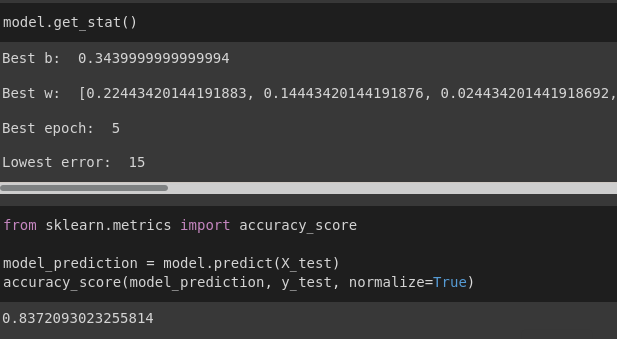

Hasil Run 2 :

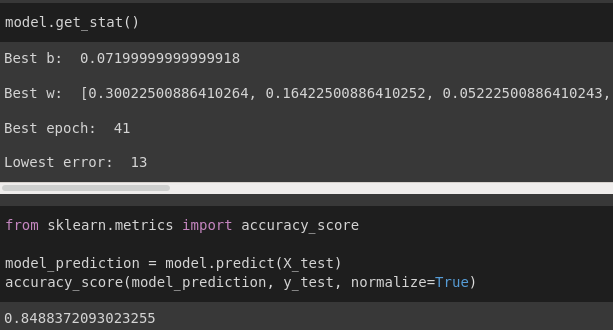

Hasil Run 3 :

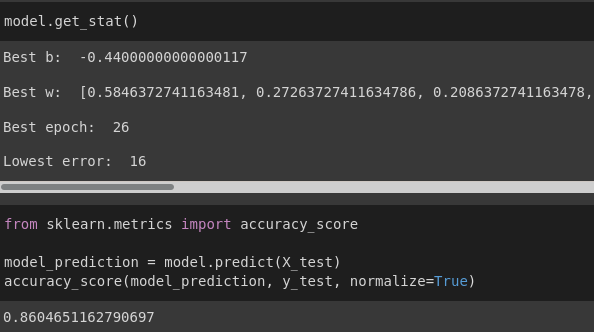

Hasil Run 4 :

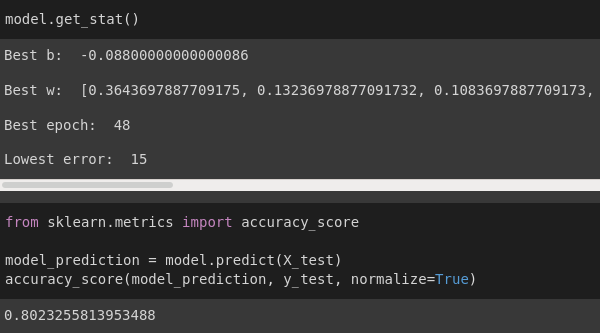

Hasil Run 5 :

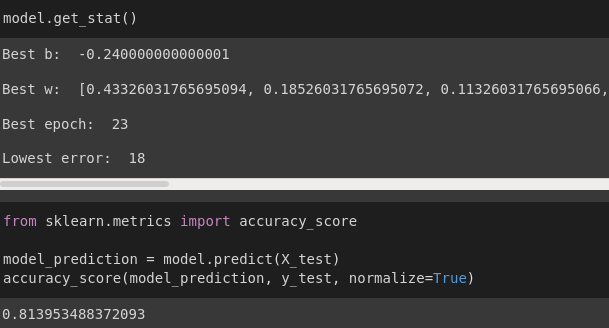

Hasil Run 6:

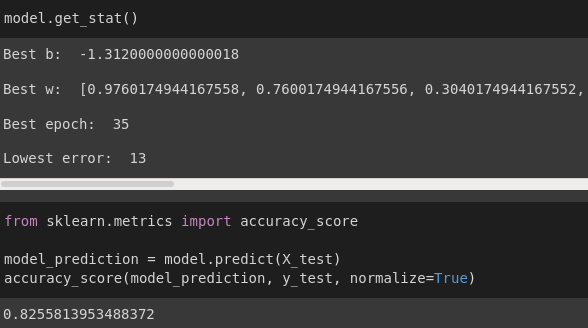

Hasil Run 7 :

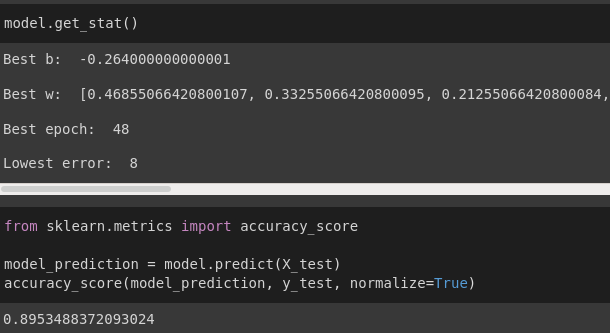

## ❔ Alasan nilai akurasi bisa berbeda setiap kali run

Dikutip dari [Research Gate](https://www.researchgate.net/post/Whenever-i-run-my-neural-network-I-get-different-result), Berikut adalah pendapat beberapa tokoh edukasi di universitas mengenai perbedaan nilai akurasi : 

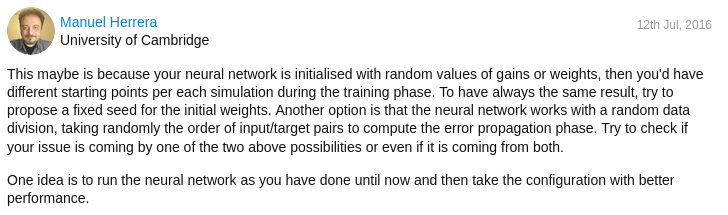

> "... karena neural network anda diinisialisasi dengan nilai weight random sehingga dalam setiap kali simulasi (eksekusi), hasilnya akan berbeda. Agar mengatasi hal ini, baiknya dinisialisasikan nilai awal weight ..." <br />
> -- Manuel Herrera, University of Cambridge

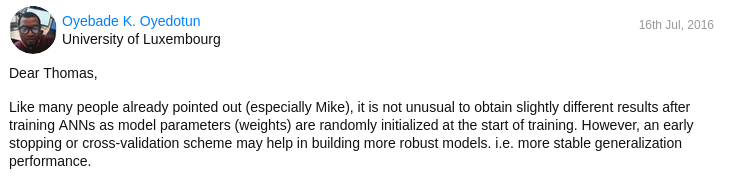

> "... itu bukan hal yang tidak biasa bahwa hasilnya sedikit berbeda ketika training ANN, yang mana model parameter (weights) diinisialisasikan secara random pada awal ..." <br />
-- Oyebade K. Oyedotun, University of Luxembourg

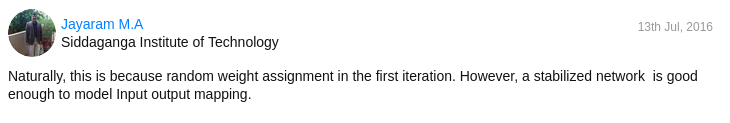

> "... ini karena nilai weight diinisialisasikan secara random pada iterasi pertama ..." <br />
> -- Jayaram M.A., Siddaganga Institute of Technology

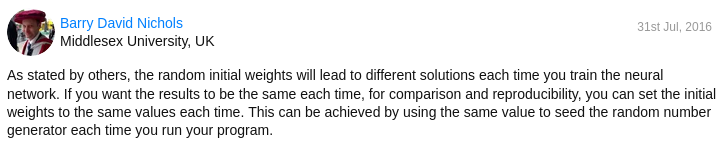

> "... nilai weight random yang diinisialisasikan akan mengakibatkan solusi yang berbeda setiap kali anda melakukan training neural network  ..." <br />
> -- Barry David Nichols, Middlesex University

Oleh karena itu, penulis mengambil Bias & Weight dari training model yang menghasilkan nilai akurasi terbaik untuk diimplementasikan pada aplikasi web menggunakan Flask.

Referensi : <br/>
Hossain, M., Rahman, M., Prodhan, U. K., & Khan, M. (2013). Implementation of back-propagation neural network for isolated Bangla speech recognition. arXiv preprint arXiv:1308.3785.